In [0]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import time
import matplotlib.pyplot as plt
import numpy as np

In [0]:
tf.__version__
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [4]:
tfe.enable_eager_execution()
tfe.executing_eagerly()

True

for the learning rate of 0.001:
Loss at step 000: 2.147
Loss at step 500: 1.907
Loss at step 1000: 1.678
Loss at step 1500: 1.462
Loss at step 2000: 1.260
Loss at step 2500: 1.076
Loss at step 3000: 0.911
W : 1.7641266584396362 , b = 1.2949693202972412 
for the learning rate of 0.01:
Loss at step 000: 2.142
Loss at step 500: 0.488
Loss at step 1000: 0.357
Loss at step 1500: 0.356
Loss at step 2000: 0.356
Loss at step 2500: 0.356
Loss at step 3000: 0.356
W : 2.936732530593872 , b = 2.0280137062072754 
for the learning rate of 0.1:
Loss at step 000: 2.099
Loss at step 500: 0.356
Loss at step 1000: 0.356
Loss at step 1500: 0.356
Loss at step 2000: 0.356
Loss at step 2500: 0.356
Loss at step 3000: 0.356
W : 2.936753034591675 , b = 2.0280330181121826 
for the learning rate of 1.0:
Loss at step 000: 1.669
Loss at step 500: 0.356
Loss at step 1000: 0.356
Loss at step 1500: 0.356
Loss at step 2000: 0.356
Loss at step 2500: 0.356
Loss at step 3000: 0.356
W : 2.9367549419403076 , b = 2.028034925

<function matplotlib.pyplot.show>

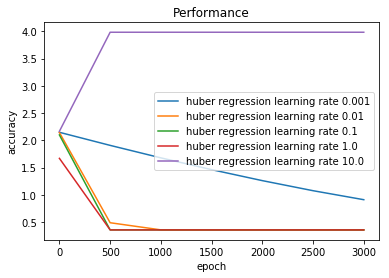

In [7]:
# Create data
NUM_EXAMPLES = 500

#define inputs and outputs with some noise 
X = tf.random_normal([NUM_EXAMPLES])  #inputs 
noise = tf.random_normal([NUM_EXAMPLES]) #noise 
y = X * 3 + 2 + noise  #true output

# Create variables.
W = None
b = None


train_steps = 3500
# Define the linear predictor.
def prediction(x):
  yhat = X * W + b
  return yhat

# Define loss functions of the form: L(y, y_predicted)
def squared_loss(y, y_predicted):
  error = y_predicted - y
  loss = tf.reduce_mean(tf.square(error))
  return loss
# def huber_loss(y, y_predicted, m=1.0):
#   error = y_predicted - y
#   """Huber loss."""
#   loss= tf.reduce_mean(tf.convert_to_tensor([((1/2)*(tf.square(err))) if (tf.math.abs(err)) <=(m) else (m*(tf.math.abs(err))-(1/2)*m*m) for err in error]))
#   return loss
def huber_loss(y,y_predicted, m=1.0):
    error = tf.math.abs(y_predicted - y)
    flag = (error > m)
    loss=(tf.reduce_sum(0.5 * tf.square(tf.boolean_mask( ((error)),(~flag)))) -tf.reduce_sum( m * (0.5 * m -(tf.boolean_mask(error,(flag)  )))))/len(error)
    return loss
def Pseudo_huber_loss(y, y_predicted, m=1.0): #this is the hybrid-strongly_convex L1L2 norm form of huber loss
  error =tf.math.abs(y_predicted - y)
  loss = tf.reduce_mean(m*m*(tf.sqrt(1+(error/m)**2)-1))
  return loss

for learning_rate in np.logspace(-3,1,num=5,base=10):
  print(f'for the learning rate of {learning_rate}:')
  accuracy=list()
  W = tf.Variable(0.)
  b = tf.Variable(0.)
  for i in range(train_steps):
    ###TO DO ## Calculate gradients
    with tf.GradientTape() as tape:
      dW, db = tape.gradient(Pseudo_huber_loss(y,prediction(X)), [W, b])
      W.assign_sub(dW * learning_rate)
      b.assign_sub(db* learning_rate)
      if i % 500 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, Pseudo_huber_loss(y,prediction(X))))
        accuracy.append(Pseudo_huber_loss(y,prediction(X)))
  print(f'W : {W.numpy()} , b = {b.numpy()} ')
  plt.plot([i*500 for i in range(len(accuracy))], accuracy,
  label=f"huber regression learning rate {learning_rate}")
  print('==================')
  
plt.title('Performance')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show
#   plt.plot(test_sam_perf[i].keys(), test_sam_perf[i].values())
#   if i==10:
#     plt.text(list(test_sam_perf[i].keys())[2],list(test_sam_perf[i].values())[2],'This is from line {}'.format(i))
#   else:
#     if list(test_sam_perf[i-1].values())!=list(test_sam_perf[i].values()):    
#        plt.text(list(test_sam_perf[i].keys())[2],list(test_sam_perf[i].values())[2],'This is from line {} '.format(i))
        
